In [30]:
import pandas as pd
import geopandas as gpd
import os
import sys
from datetime import datetime
import contextily as ctx
import itertools
import matplotlib.pyplot as plt

import logging
logging.getLogger().setLevel(logging.INFO)
from dotenv import load_dotenv
load_dotenv()

sys.path.append(os.path.realpath('../'))
from util.isochrones import Isochrones
from util.extract_urbancenter import ExtractCenters

DROOT = '../1-data/'

In [2]:
cities = pd.read_excel(os.path.join(DROOT, '1-research', 'cities.xlsx'), index_col=0)
cities = cities[cities.City == 'Vienna']
cities.head(10)

,City,ctr_name,ctr_lat,ctr_lon,cells,Country,ID_HDC_G0
0,Vienna,Rathaus Wien,48.2108,16.35784,4381,AUT,3027


In [15]:
CACHE = os.path.join(DROOT, '3-interim', 'graphhopper.db')
isochrone_client   = Isochrones(graphhopper_url="http://localhost:8989", db=CACHE)
urbancenter_client = ExtractCenters(src_dir=os.path.join(DROOT, '2-external'))

for pid, city in cities.iterrows():
    
    # Extract urban center and read in as pickle
    pcl_path = urbancenter_client.extract_city(
        city.City, 
        city.ID_HDC_G0, 
        os.path.join(DROOT, '3-interim', 'populationmasks'))
    gdf = gpd.GeoDataFrame(pd.read_pickle(pcl_path))
    
    origins  = enumerate(gdf.centroid.to_crs("EPSG:4326"))
    times    = [5] #, 15, 25, 35, 45]
    modes_dt = [
        ('driving', 'driving',      datetime(2023, 6, 13, 8, 30, 37)), 
        ('transit', 'transit-peak', datetime(2023, 6, 13, 8, 30, 37)), 
        ('transit', 'transit',      datetime(2023, 6, 13, 13, 0, 37)), 
        ('cycling', 'cycling',      datetime(2023, 6, 13, 13, 0, 37)), 
        ('walking', 'walking',      datetime(2023, 6, 13, 8, 30, 37))
    ]
    batch      = list(itertools.product(origins, times, modes_dt))
    isochrones = isochrone_client.get_isochrones(city.ID_HDC_G0, batch, fetch=False)
isochrones

INFO:root:Population raster extract already exists: Vienna (3027)
INFO:root:Converted batch to timezone Europe/Vienna.
INFO:root:Out of total 1960, 25.31% cached.


,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,isochrone
0,3027-0-driving-5m-v0,0,POINT (16.30932 48.31130),5,driving,driving,2023-06-13 08:30:37+02:00,"POLYGON ((16.30780 48.30605, 16.30799 48.30584..."
1,3027-0-transit-peak-5m-v0,0,POINT (16.30932 48.31130),5,transit,transit-peak,2023-06-13 08:30:37+02:00,"MULTIPOLYGON (((16.30667 48.30942, 16.30667 48..."
2,3027-0-transit-5m-v0,0,POINT (16.30932 48.31130),5,transit,transit,2023-06-13 13:00:37+02:00,"MULTIPOLYGON (((16.30667 48.30942, 16.30667 48..."
3,3027-0-cycling-5m-v0,0,POINT (16.30932 48.31130),5,cycling,cycling,2023-06-13 13:00:37+02:00,"POLYGON ((16.30999 48.31496, 16.30988 48.31516..."
4,3027-0-walking-5m-v0,0,POINT (16.30932 48.31130),5,walking,walking,2023-06-13 08:30:37+02:00,"POLYGON ((16.30932 48.31214, 16.30911 48.31231..."
...,...,...,...,...,...,...,...,...
1955,3027-391-driving-5m-v0,391,POINT (16.32068 48.04752),5,driving,driving,2023-06-13 08:30:37+02:00,None
1956,3027-391-transit-peak-5m-v0,391,POINT (16.32068 48.04752),5,transit,transit-peak,2023-06-13 08:30:37+02:00,None
1957,3027-391-transit-5m-v0,391,POINT (16.32068 48.04752),5,transit,transit,2023-06-13 13:00:37+02:00,None
1958,3027-391-cycling-5m-v0,391,POINT (16.32068 48.04752),5,cycling,cycling,2023-06-13 13:00:37+02:00,"POLYGON ((16.32346 48.05325, 16.32311 48.05434..."


,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,isochrone
50,3027-10-driving-5m-v0,10,POINT (16.42322 48.30187),5,driving,driving,2023-06-13 08:30:37+02:00,"POLYGON ((16.43575 48.30746, 16.44116 48.30744..."
51,3027-10-transit-peak-5m-v0,10,POINT (16.42322 48.30187),5,transit,transit-peak,2023-06-13 08:30:37+02:00,"POLYGON ((16.41867 48.30129, 16.42136 48.29843..."
52,3027-10-transit-5m-v0,10,POINT (16.42322 48.30187),5,transit,transit,2023-06-13 13:00:37+02:00,"POLYGON ((16.41867 48.30129, 16.42136 48.29843..."
53,3027-10-cycling-5m-v0,10,POINT (16.42322 48.30187),5,cycling,cycling,2023-06-13 13:00:37+02:00,"POLYGON ((16.42547 48.30574, 16.42776 48.30857..."
54,3027-10-walking-5m-v0,10,POINT (16.42322 48.30187),5,walking,walking,2023-06-13 08:30:37+02:00,"POLYGON ((16.42461 48.30020, 16.42777 48.30343..."


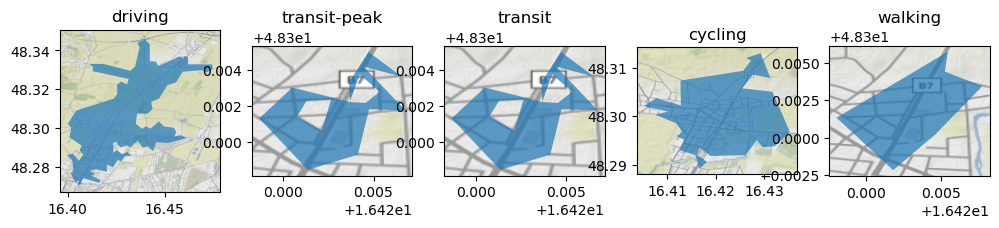

In [53]:
sample = isochrones.set_geometry('isochrone')[isochrones.pid == 10]
sample.isochrone = sample.isochrone.simplify(tolerance=0.001)
fig, axs = plt.subplots(ncols=5, figsize=(12, 60), sharey=True, sharex=True)
for i, (rid, row) in enumerate(sample.iterrows()):
    gpd.GeoSeries([row.isochrone]).plot(alpha=0.7, ax=axs[i])
    ctx.add_basemap(ax=axs[i], crs=isochrones.crs, attribution='', zoom=14)
    axs[i].set_title(row.modetime)
sample

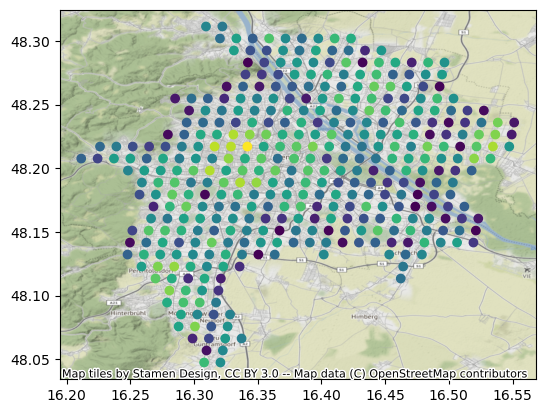

In [11]:
isochrones['surface'] = isochrones.set_geometry('isochrone').to_crs(isochrones.estimate_utm_crs()).area
ax = isochrones.set_geometry('startpt').plot(column='surface')
ctx.add_basemap(ax=ax, crs=isochrones.crs)

In [ ]:
# Analysis of reach during off-peak and on-peak times
offpeak = isochrones[(isochrones.modetime == 'transit') & (isochrones.tt_mnts==15)
                    ].to_crs(isochrones.estimate_utm_crs()).area

onpeak  = isochrones[(isochrones.modetime == 'transit-peak') & (isochrones.tt_mnts==15)
                    ].to_crs(isochrones.estimate_utm_crs()).area
bins = np.linspace(0, 8e6, 17)
plt.hist([offpeak, onpeak], bins, label=['off', 'on'], )

In [ ]:
w = isochrones
w['area'] = isochrones.to_crs(isochrones.estimate_utm_crs()).area
wew = w.groupby('pid').area.sum()

ax = w[w.pid.isin(list(wew[wew < 100].index))].set_geometry('startpt').plot()
ctx.add_basemap(ax, crs=w.crs)

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
for i, t in enumerate(range(5, 55, 10)):
    stockholm = client.get_isochrone(STADSHUSET, f'stockholm-{t}', t, STARTDATE, 'driving')
    stockholm.plot(ax=axs[i])
    ctx.add_basemap(axs[i], crs="EPSG:4326")

In [ ]:
f1 = isochrones[(isochrones.tt_mnts == 25) & (isochrones['modetime'] == 'driving-peak')]
f1.sample(10)

,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,geometry
1417,2973-283-driving-peak-25m-v0,283,POINT (18.01459161404402 59.2778717596768),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.54528 59.18718, 17.54516 59.18729..."
1072,2973-214-driving-peak-25m-v0,214,POINT (18.180824235970285 59.31942546516677),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.69975 59.20760, 17.69958 59.20770..."
292,2973-58-driving-peak-25m-v0,58,POINT (17.809407914986245 59.3921888249154),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.49665 59.58740, 17.49655 59.58752..."
867,2973-173-driving-peak-25m-v0,173,POINT (18.15746029047635 59.34020922644428),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.82625 59.45413, 17.82623 59.45427..."
167,2973-33-driving-peak-25m-v0,33,POINT (17.907861413584452 59.412988757317855),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.44467 59.59687, 17.44456 59.59699..."
72,2973-14-driving-peak-25m-v0,14,POINT (17.838611689805763 59.43379332283908),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.36948 59.62607, 17.36938 59.62619..."
1182,2973-236-driving-peak-25m-v0,236,POINT (18.162066230052076 59.30903531272011),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.67688 59.20639, 17.67682 59.20652..."
497,2973-99-driving-peak-25m-v0,99,POINT (17.92433035841332 59.37139351993459),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.48820 59.59046, 17.48814 59.59059..."
752,2973-150-driving-peak-25m-v0,150,POINT (18.100085241369325 59.35060283668956),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.65111 59.52335, 17.65107 59.52348..."
1397,2973-279-driving-peak-25m-v0,279,POINT (17.953757197449526 59.2778717596768),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.47934 59.18596, 17.47919 59.18607..."


In [ ]:
# peak = f1[f1['modetime'] == 'driving-peak']
# offp = f1[f1['modetime'] == 'driving']

# fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# peak.plot(ax=axs[0], color='red', alpha=0.5)
# offp.plot(ax=axs[1], color='blue', alpha=0.5)

# ctx.add_basemap(ax=axs[0], crs=isochrones.crs)
# ctx.add_basemap(ax=axs[1], crs=isochrones.crs)

In [ ]:
f1['reach_drive'] = f1.geometry.apply(lambda isoch: gdf[gdf.intersects(isoch)].cell_pop.sum())
f1.head()

/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,uid,pid,startpt,tt_mnts,mode,modetime,dep_dt,geometry,reach_drive
2,2973-0-driving-peak-25m-v0,0,POINT (17.803324010715333 59.46500887070904),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.21427 59.64009, 17.21412 59.64020...",0.0
7,2973-1-driving-peak-25m-v0,1,POINT (17.818586183034853 59.46500887070904),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.16985 59.64568, 17.16971 59.64580...",0.0
12,2973-2-driving-peak-25m-v0,2,POINT (17.784571631772113 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.35538 59.62720, 17.35526 59.62732...",0.0
17,2973-3-driving-peak-25m-v0,3,POINT (17.799830809491347 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.29834 59.63244, 17.29820 59.63255...",0.0
22,2973-4-driving-peak-25m-v0,4,POINT (17.815089987210587 59.45460252718758),25,driving,driving-peak,2023-05-02 08:30:37,"POLYGON ((17.35112 59.62763, 17.35099 59.62775...",0.0


In [ ]:
f1 = f1.merge(gdf.reset_index(), left_on='pid', right_on='index', suffixes=('', '_gdf'))

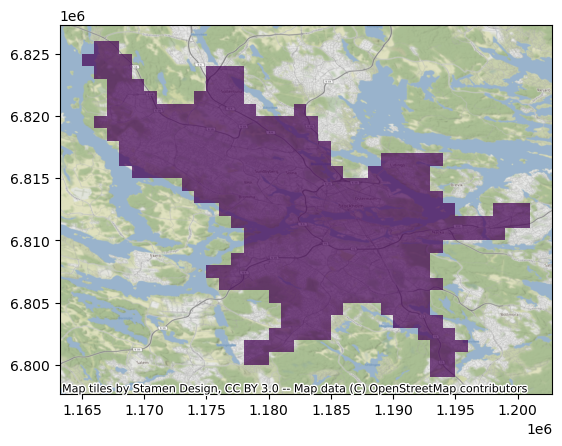

In [ ]:
ax = f1.set_geometry('geometry_gdf').plot(column='reach_drive', alpha=0.7)
ctx.add_basemap(ax=ax, crs=f1.set_geometry('geometry_gdf').crs)

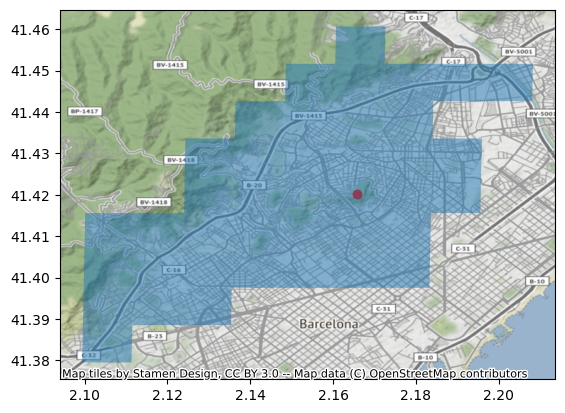

In [ ]:
gdf = gdf.to_crs("EPSG:4326")
ax = f1.set_geometry('startpt').iloc[:1].plot(color='red')
gdf[gdf.intersects(f1.iloc[0].geometry)].plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf.crs)

<Axes: >

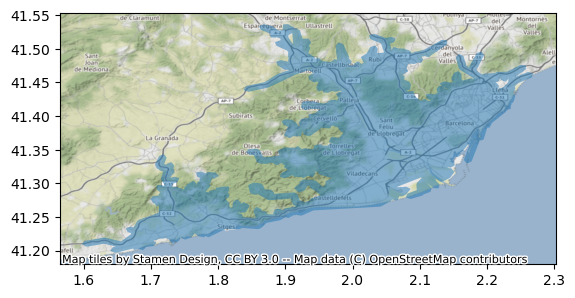

In [ ]:
marta_plot = isochrones.sample(1).plot(alpha=0.5)
ctx.add_basemap(ax=marta_plot, crs=isochrones.crs)
marta_plot